## OYO Business Analyst Interview Questions

Python Questions Dataset
1. Write a Python function to calculate the revenue generated per city from a dataset of hotel bookings stored in a CSV file. Each row contains columns: city, room_price, and number_of_nights.
2. Write a Python program to find the city with the highest growth in bookings month-over-month using a dataset with columns: city, booking_date, and number_of_bookings.
3. Create a Python script to calculate the percentage of cancellations for each property from a dataset containing columns: property_id, booking_status (confirmed/cancelled).
4. Write a Python function to identify properties with unusually high cancellation rates using the Z-score method on the cancellation percentage.
5. Write a Python program to plot a bar chart showing the top 5 cities by total revenue using Matplotlib or Seaborn.


In [2]:
!pip install ipython-sql prettytable

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.5 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [3]:
# Viewing all the dataframes
dfb = pd.read_csv('booking_growth.csv')
dfc = pd.read_csv('cancellations.csv')
dfh = pd.read_csv('hotel_bookings.csv')

In [4]:
# Booking growth df
dfb.head()

,city,booking_date,number_of_bookings
0,New York,2024-02-24,17
1,Miami,2024-12-24,44
2,Los Angeles,2024-05-10,28
3,Houston,2024-10-14,29
4,Miami,2024-09-22,21


In [5]:
# Cancellations df
dfc.head()

,property_id,booking_status
0,P17,confirmed
1,P10,confirmed
2,P10,cancelled
3,P4,confirmed
4,P20,cancelled


In [6]:
# hotel bookings df
dfh.head()

,city,room_price,number_of_nights
0,Houston,147,3
1,Miami,247,7
2,Chicago,444,2
3,Miami,289,2
4,Miami,193,7


### Write a Python function to calculate the revenue generated per city from a dataset of hotel bookings stored in a CSV file. Each row contains columns: city, room_price, and number_of_nights.

In [10]:
# Calculating revenue generated per city
def revenue_per_city(df):
  df['revenue'] = df['room_price'] * df['number_of_nights']
  revenue_per_city = df.groupby('city')['revenue'].sum().sort_values(ascending=False)
  return revenue_per_city

revenue_per_city(dfh)

,revenue
city,
Houston,62625
New York,56076
Miami,53663
Chicago,51467
Los Angeles,43513


### Write a Python program to find the city with the highest growth in bookings month-over-month using a dataset with columns: city, booking_date, and number_of_bookings.

In [33]:
# Finding the city with the highest growth in bookings month-over-month
def highest_growth(df):
  df['booking_date'] = pd.to_datetime(df['booking_date'])
  df['month'] = df['booking_date'].dt.month
  df_grouped = df.groupby(['city', 'month'])['number_of_bookings'].sum().reset_index()
  df_grouped['growth'] = df_grouped.groupby('city')['number_of_bookings'].pct_change()
  highest_growth = df_grouped.groupby('city')['growth'].max().idxmax()
  return highest_growth

highest_growth(dfb)

'Los Angeles'

### Create a Python script to calculate the percentage of cancellations for each property from a dataset containing columns: property_id, booking_status (confirmed/cancelled).

In [25]:
# Calculating the percentage of cancellations for each property
def cancellation_percentage(df):
  df_grouped = df.groupby('property_id')['booking_status'].value_counts(normalize=True) * 100
  df_grouped = df_grouped.unstack()
  df_grouped.columns = ['cancelled_percentage', 'confirmed_percentage']
  return df_grouped

cancellation_percentage(dfc)

,cancelled_percentage,confirmed_percentage
property_id,,
P1,57.142857,42.857143
P10,26.315789,73.684211
P11,42.857143,57.142857
P12,33.333333,66.666667
P13,31.250000,68.750000
P14,23.076923,76.923077
P15,18.181818,81.818182
P16,16.666667,83.333333
P17,28.571429,71.428571


### Write a Python function to identify properties with unusually high cancellation rates using the Z-score method on the cancellation percentage.

In [31]:
# Identifying properties with unusually high cancellation rates using the Z-score method on the cancellation percentage
import scipy.stats as stats
def zscore_method(df):
  df_grouped = df.groupby('property_id')['booking_status'].value_counts(normalize=True) * 100
  df_grouped = df_grouped.unstack()
  df_grouped.columns = ['cancelled_percentage', 'confirmed_percentage']
  zscore = stats.zscore(df_grouped['cancelled_percentage'])
  outliers = df_grouped[np.abs(zscore) > 2]
  return outliers

zscore_method(dfc)

,cancelled_percentage,confirmed_percentage
property_id,,
P1,57.142857,42.857143


### Write a Python program to plot a bar chart showing the top 5 cities by total revenue using Matplotlib or Seaborn.

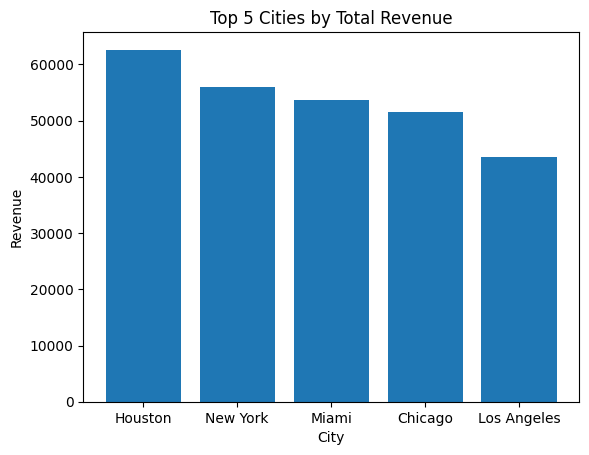

In [43]:
# Plotting a bar chart showing the top 5 cities by total revenue using Matplotlib or Seaborn

def revenuebarplot(df):
  df['revenue'] = df['room_price'] * df['number_of_nights']
  df_grouped = df.groupby('city')['revenue'].sum().sort_values(ascending=False)
  top_5_cities = df_grouped.head(5)
  plt.bar(top_5_cities.index, top_5_cities.values)
  plt.xlabel('City')
  plt.ylabel('Revenue')
  plt.title('Top 5 Cities by Total Revenue')
  plt.show()

revenuebarplot(dfh)